# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [74]:
from sklearn.svm import SVC
from itertools import product

# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(d, n, S_n):
    
    # for y in different assigment of classes to points in S_n:
    #     check if they are linearly separable
    #     i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
    is_separable = True
    for y in product(range(2), repeat = n):
        svc = SVC(C = 10000, shrinking = False, kernel = 'linear', tol = 1e-5)
        svc.fit(S_n, y)

    # if for at least for one y the answer is no, then return False, else return True
    # return True/False

In [75]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def is_shattered_plot(d, n, S_n):
    combs = list(product(range(2), repeat = n))
    n_combs = len(combs)

    fig, axs = plt.subplots(n_combs // 4, 4, figsize = (8, 8))
    axs = axs.flatten()

    counts = 0

    for y, ax in zip(combs, axs):
        is_separable = True
        
        if len(set(y)) == 1:
            continue

        ax.scatter(S_n[:, 0], S_n[:, 1], c = y, cmap = 'PiYG')

        svc = SVC(C = 10000, shrinking = False, kernel = 'linear', tol = 1e-5)
        svc.fit(S_n, y)

        if not all(svc.predict(S_n) == y):
            is_separable = False
            counts += 1

        ax.set_title(is_separable)

    return counts == 0

### c)

False

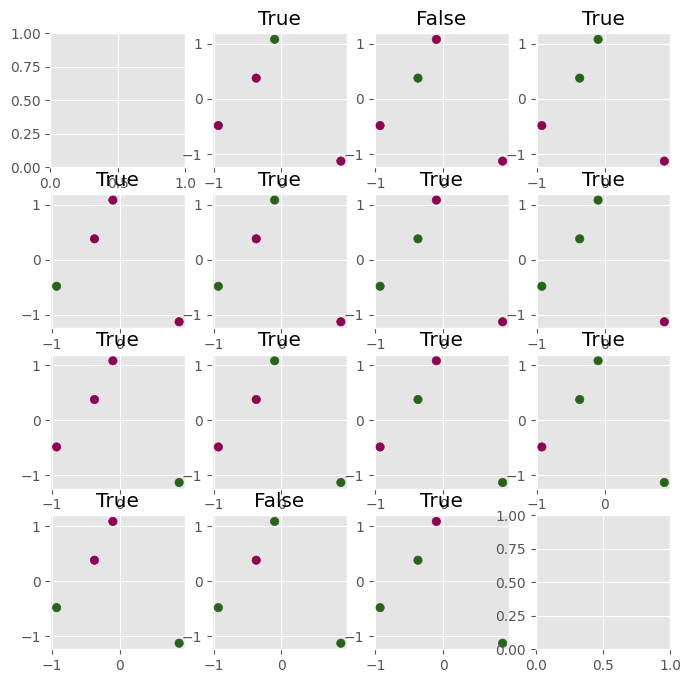

In [76]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

n = 4
d = 2
S_n = np.random.randn(n, d)

is_shattered_plot(d, n, S_n)

### d)

In [77]:
n = 3
combs = list(product(range(2), repeat = n))
combs

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [78]:
def is_shattered(S):
    n = S.shape[0]
    for k in range(1, n):
        for comb in combinations(np.arange(n), k):
            y = np.zeros(n)
            y[list(comb)] = 1
            svc = SVC(C = 10000, shrinking = False, kernel = 'linear', tol = 1e-5)
            svc.fit(S, y)
            if not all(svc.predict(S) == y):
                return False
    return True

S = np.random.randn(4, 8)
is_shattered(S)

True

In [79]:
# code

d_range = range(2, 11)
N = 50

for d in d_range:
    n_range = range(max(d - 2, 1), d + 4)
    for n in n_range:
        is_finished = False
        for i in range(N):
            S = np.random.randn(n, d)
            if not is_shattered(S):
                print(f'Estimated VC for d={d}: {n}')
                print(f'True VC for d={d}: {d + 1}\n')
                is_finished = True
                break
        if is_finished:
            break



Estimated VC for d=2: 3
True VC for d=2: 3

Estimated VC for d=3: 4
True VC for d=3: 4

Estimated VC for d=4: 5
True VC for d=4: 5

Estimated VC for d=5: 6
True VC for d=5: 6

Estimated VC for d=6: 8
True VC for d=6: 7

Estimated VC for d=7: 9
True VC for d=7: 8

Estimated VC for d=8: 9
True VC for d=8: 9

Estimated VC for d=9: 10
True VC for d=9: 10

Estimated VC for d=10: 12
True VC for d=10: 11



### e)

In [80]:
# A hint: change a kernel in SVM